<a href="https://colab.research.google.com/github/kok554/computervision/blob/main/CNN%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


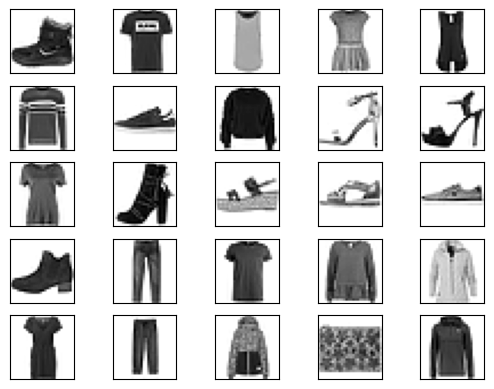

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',' Coat',
               'Sandal', 'Shirt','Sneaker','Bag','Ankle boot']

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1009 - loss: 2.3028
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1042 - loss: 2.3022
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1207 - loss: 2.3000
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1472 - loss: 2.2946
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1549 - loss: 2.2842
313/313 - 1s - 4ms/step - accuracy: 0.1907 - loss: 2.2730


[2.27295184135437, 0.1906999945640564]

In [7]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [8]:
def print_image_summary(image, labels):

  print('-------------------------')
  print('Image Details:')
  print('-------------------------')
  print(f'Image dimensions: {image.shape}')

  print('Channels:')

  if len(labels) == 1:
    image = image[..., np.newaxis]

  for i, lab in enumerate(labels):
    min_val = np.min(image[:,:,i])
    max_val = np.max(image[:,:,i])
    print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

(-0.5, 182.5, 170.5, -0.5)

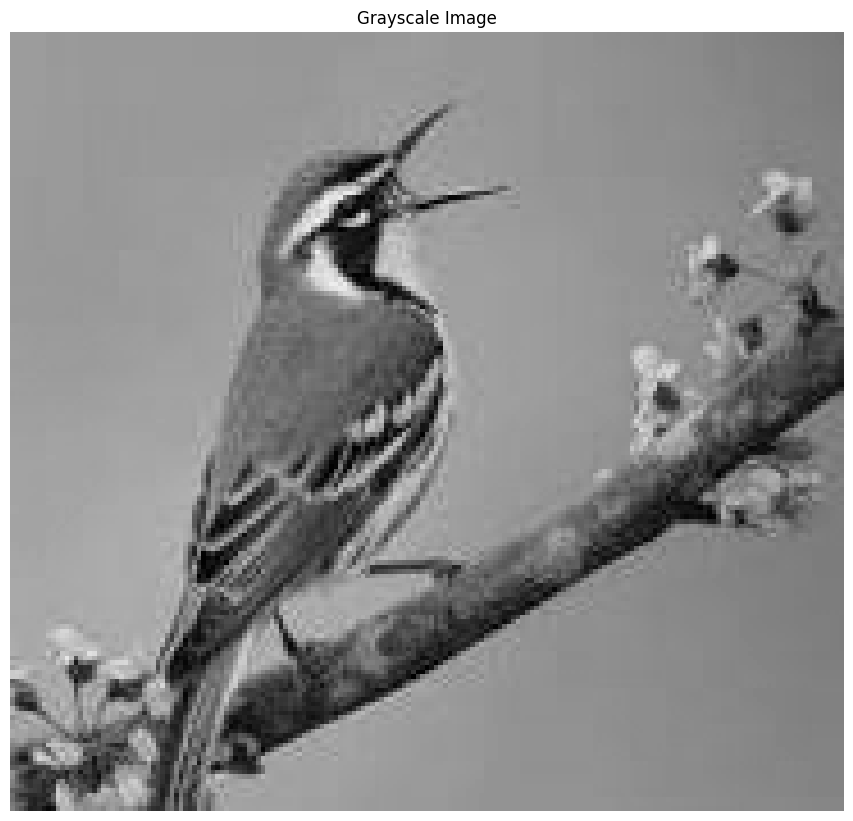

In [11]:
image_gs = imread('/content/bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale Image')
ax.axis('off')

In [12]:
print_image_summary(image_gs, ['G'])

-------------------------
Image Details:
-------------------------
Image dimensions: (171, 183)
Channels:
G : min=0.0014, max=0.9564


In [13]:
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [14]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same',activation='relu',
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0974 - loss: 2.3029
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0975 - loss: 2.3028
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0984 - loss: 2.3027
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0994 - loss: 2.3027
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1000 - loss: 2.3027
313/313 - 2s - 6ms/step - accuracy: 0.1000 - loss: 2.3027


[2.3026747703552246, 0.10000000149011612]